In [1]:
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
#import boston housing dataset from sklearn
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
cancer_data = pd.DataFrame(breast_cancer_data.data, columns = breast_cancer_data.feature_names)
cancer_data['diagnosis'] = breast_cancer_data.target


In [3]:
#normalize the features and do a train-test split of 70-30 with random_state = 42
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = cancer_data.drop(columns = ['diagnosis'])
y = cancer_data['diagnosis'].to_numpy()

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [4]:
y.shape

(569,)

In [5]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=False)

testdata = torch.utils.data.TensorDataset(X_test, y_test)
test_iter = torch.utils.data.DataLoader(testdata, batch_size=10, shuffle=False)

In [6]:
#Define training hyperprameters
batch_size=10
num_epochs = 300
size_hidden = 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix
n_output = 1

In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(cols, size_hidden)   
        self.predict = nn.Linear(size_hidden, n_output)   

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)   
        x = self.sigmoid(x)          
        return x
net = Net(cols, size_hidden, n_output)

In [8]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [9]:
loss_values_train = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_train.append(running_loss)
        running_loss = 0.0            


loss_values_test = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in test_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_test.append(running_loss)
        running_loss = 0.0  
                

Text(0.5, 1.0, 'Winsconsin Breast Cancer Logistic Regression Learning Curve with rate 0.01')

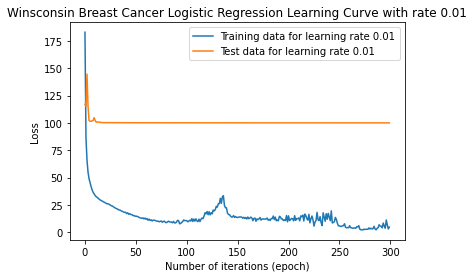

In [10]:
plt.plot(loss_values_train, label='Training data for learning rate 0.01')
plt.plot(loss_values_test, label='Test data for learning rate 0.01')
plt.legend()
plt.xlabel('Number of iterations (epoch)')
plt.ylabel('Loss')
plt.title('Winsconsin Breast Cancer Logistic Regression Learning Curve with rate 0.01')

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score
from torch.autograd import Variable


def calculate_acc(x,y=[]):
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result = result.data[:,0]
    
    if len(y) != 0:
        acc = accuracy_score(y, result.round(), normalize=True)
        return acc


In [12]:
training_acc = calculate_acc(X_train,y_train)
test_acc = calculate_acc(X_test,y_test)

print("Accuracy for training data is: ", training_acc)
print("Accuracy for test data is: ", test_acc)

Accuracy for training data is:  0.9824120603015075
Accuracy for test data is:  0.9941520467836257


In [13]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer2 = torch.optim.Adam(net.parameters(), lr=0.001)

In [14]:
loss_values_train2 = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer2.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_train2.append(running_loss)
        running_loss = 0.0            


loss_values_test2 = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in test_iter:
            # forward pass
            outputs = net(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer2.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        #print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
        loss_values_test2.append(running_loss)
        running_loss = 0.0  
                

Text(0.5, 1.0, 'Winsconsin Breast Cancer Logistic Regression Learning Curve with rate 0.001')

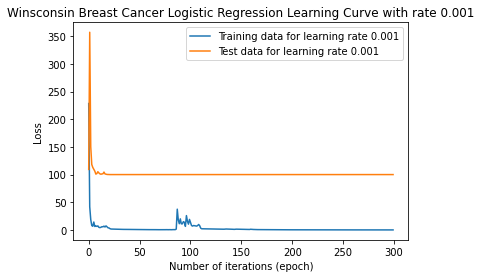

In [15]:
plt.plot(loss_values_train2, label='Training data for learning rate 0.001')
plt.plot(loss_values_test2, label='Test data for learning rate 0.001')
plt.legend()
plt.xlabel('Number of iterations (epoch)')
plt.ylabel('Loss')
plt.title('Winsconsin Breast Cancer Logistic Regression Learning Curve with rate 0.001')

**Compare the accuracy on the training data with the accuracy on the test data.** 

We see an accuracy score of 0.982 for the training data and
0.994 for the test data. This tells us that the model can almost perfectly predict a breast diagnosis given the training data.


**Did you see any major difference between the two learning rates that you used?** 



**How many iterations were needed for convergence?**

The larger (0.01) learning rate being 10 times the smaller (0.001) one, we see a multiple local optimas in the smaller learning rate with convergence happening after about 170 iterations.